In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.lines as mlines
import numpy as np

In [3]:
def plot_data(X, y, ds_num):
    # Separate the points based on the labels so that we can plot the figure in a color blind friendly manner.
    X_neg = X[np.array(y) == 0]
    X_pos = X[np.array(y) == 1]
    
    # Plot the points with different markers.
    plt.scatter(X_neg[:, 0], X_neg[:, 1], c='indigo', marker='x', label='0')
    plt.scatter(X_pos[:, 0], X_pos[:, 1], c='gold', marker='o', label='1')
    
    plt.title(f"Dataset {ds_num}")
    plt.legend()
    plt.savefig(f'image/dataset_{ds_num}.jpg')
    plt.show() 

Looks separable using a linear function

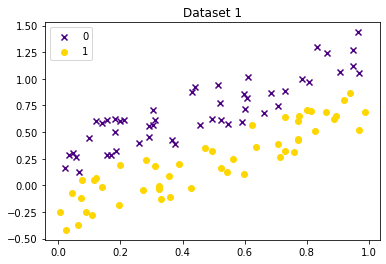

In [383]:
n_samples=100

def generate_X_lin(num_points=100, x_center=0.5, seed=42):
    np.random.seed(seed)  # Set the seed for reproducibility
    assert num_points % 2 == 0, "Number of points must be even."
    half_points = num_points // 2
    
    # Generate x-values around the center
    x_values_above = np.random.rand(half_points) + x_center - 0.5
    x_values_below = np.random.rand(half_points) + x_center - 0.5
    
    # Calculate y-values based on the linear function y = x with random noise
    y_values_above = x_values_above + np.random.rand(half_points) * 0.5
    y_values_below = x_values_below - np.random.rand(half_points) * 0.5
    
    # Combine x and y values
    X_lin_above = np.vstack((x_values_above, y_values_above)).T
    X_lin_below = np.vstack((x_values_below, y_values_below)).T
    
    return np.vstack((X_lin_above, X_lin_below))

# Generate the data
X_lin = generate_X_lin(num_points=n_samples, x_center=0.5)

y_lin_0 = [0 for _ in range(n_samples//2)]
y_lin_1 = [1 for _ in range(n_samples//2)]
y_lin = y_lin_0 + y_lin_1

plot_data(X_lin, y_lin, 1)

Looks separable using a polynomial function of degree 3

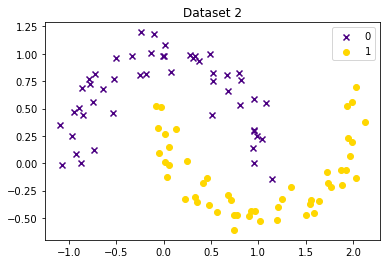

In [384]:
from sklearn.datasets import make_moons
  
X_poly, y_poly = make_moons(n_samples=100, noise=0.1) 
plot_data(X_poly, y_poly, 2)

Looks separable using a gaussian function of in 3 dimension

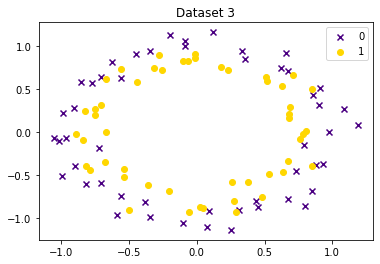

In [5]:
# from sklearn.datasets import make_circles 
  
# X_gaus, y_gaus = make_circles(n_samples=100, shuffle=True,  
#                     noise=0.1, random_state=5) 
# plot_data(X_gaus, y_gaus, 3)

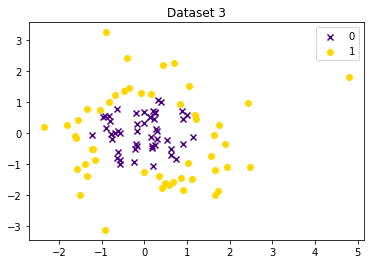

In [28]:
from sklearn.datasets import make_gaussian_quantiles 
  
X_gaus, y_gaus = make_gaussian_quantiles(n_samples=100, cov=1, n_features=2, n_classes=2, random_state=55)
plot_data(X_gaus, y_gaus, 3)

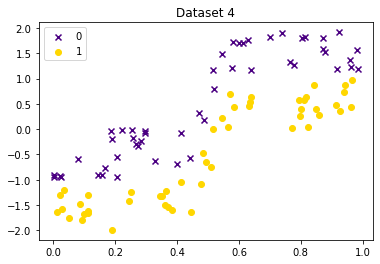

In [9]:
n_samples=100

def generate_X_rbf(num_points=100, x_center=0.5, steepness=25, seed=5): 
    np.random.seed(seed) # seed is used to not change the plot after every generation
    assert num_points % 2 == 0, "num_points must be even."
    half_points = num_points // 2
    
    # Generate x-values around the center
    x_values_above = np.random.rand(half_points) + x_center - 0.5
    x_values_below = np.random.rand(half_points) + x_center - 0.5
    
    # Calculate y-values based on the tanh function with increased steepness
    y_values_above = np.tanh(steepness * (x_values_above - x_center)) + np.random.rand(half_points) 
    y_values_below = np.tanh(steepness * (x_values_below - x_center)) - np.random.rand(half_points) 
    
    # Combine x and y values
    X_rbf_above = np.vstack((x_values_above, y_values_above)).T
    X_rbf_below = np.vstack((x_values_below, y_values_below)).T
    
    return np.vstack((X_rbf_above, X_rbf_below))

# Generate the data
X_rbf = generate_X_rbf(n_samples, x_center=0.5)

y_rbf_0 = [0 for _ in range(n_samples//2)]
y_rbf_1 = [1 for _ in range(n_samples//2)]
y_rbf = y_rbf_0 + y_rbf_1

plot_data(X_rbf, y_rbf, 4)

Looks separable using a tanh function

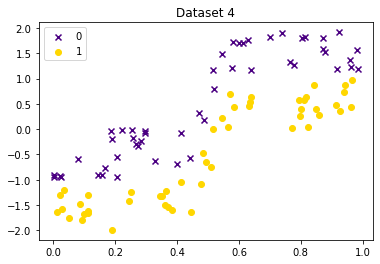

In [386]:
n_samples=100

def generate_X_tanh(num_points=100, x_center=0.5, steepness=25, seed=5): 
    np.random.seed(seed) # seed is used to not change the plot after every generation
    assert num_points % 2 == 0, "num_points must be even."
    half_points = num_points // 2
    
    # Generate x-values around the center
    x_values_above = np.random.rand(half_points) + x_center - 0.5
    x_values_below = np.random.rand(half_points) + x_center - 0.5
    
    # Calculate y-values based on the tanh function with increased steepness
    y_values_above = np.tanh(steepness * (x_values_above - x_center)) + np.random.rand(half_points) 
    y_values_below = np.tanh(steepness * (x_values_below - x_center)) - np.random.rand(half_points) 
    
    # Combine x and y values
    X_tanh_above = np.vstack((x_values_above, y_values_above)).T
    X_tanh_below = np.vstack((x_values_below, y_values_below)).T
    
    return np.vstack((X_tanh_above, X_tanh_below))

# Generate the data
X_tanh = generate_X_tanh(n_samples, x_center=0.5)

y_tanh_0 = [0 for _ in range(n_samples//2)]
y_tanh_1 = [1 for _ in range(n_samples//2)]
y_tanh = y_tanh_0 + y_tanh_1

plot_data(X_tanh, y_tanh, 4)

Get the gamma value that correspond to the value of default gamma when using sklearn SVC.
"If gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma"

In [387]:
def get_gamma(train_image):
    n_features = len(train_image[0])
    gamma = 1/(train_image.var()*n_features)

    return gamma

gamma_poly = get_gamma(X_poly)
gamma_gaus = get_gamma(X_gaus)
gamma_tanh = get_gamma(X_tanh)

Define the kernel functions (arbitrary hyperparameters are used since it is not our purpose to compare performances between using different hyperparameters)

In [388]:
def linear_kernel(x_i, x_j):
    return np.inner(x_i, x_j)

def poly_kernel(x_i, x_j, gamma=gamma_poly, coef0=0, degree=3):
    return (gamma_poly*np.inner(x_i, x_j)+coef0)**degree

def rbf_kernel(x_i, x_j, gamma=gamma_gaus): 
    return np.exp(-gamma*np.linalg.norm(x_i-x_j))

def sigmoid_kernel(x_i, x_j, gamma=gamma_tanh, coef0=0):
    return np.tanh(gamma*np.inner(x_i, x_j)+coef0)

In [389]:
def sum_inner_product_diff_label(kernel, dataset_img, dataset_label):

    index_label_zero = []
    index_label_one = []

    # find the index of the dataset which has label 0 and label 1
    for i in range(0,100):
        if dataset_label[i] == 0:
            index_label_zero.append(i)
        else:
            index_label_one.append(i)

    inner_product_list =[]

    # calculate the inner product between data points with different label 
    # with the purpose of checking whether they yield a big number, indicating a good separation, a small number, indicating a bad separation
    for i in index_label_zero: 
        for j in index_label_one:
            inner_product = kernel(dataset_img[i], dataset_img[j])
            inner_product_list.append(inner_product)
            
    # we will sum the value of each inner product between two differently labeled data points 
    return sum(inner_product_list)


In [390]:
# Creating a 4x4 DataFrame
data_diff_label = {
    'linear kernel': [sum_inner_product_diff_label(linear_kernel, X_lin, y_lin), sum_inner_product_diff_label(linear_kernel, X_poly, y_poly), sum_inner_product_diff_label(linear_kernel, X_gaus, y_gaus), sum_inner_product_diff_label(linear_kernel, X_tanh, y_tanh)],
    'polynomial kernel': [sum_inner_product_diff_label(poly_kernel, X_lin, y_lin), sum_inner_product_diff_label(poly_kernel, X_poly, y_poly), sum_inner_product_diff_label(poly_kernel, X_gaus, y_gaus), sum_inner_product_diff_label(poly_kernel, X_tanh, y_tanh)],
    'RBF kernel': [sum_inner_product_diff_label(rbf_kernel, X_lin, y_lin), sum_inner_product_diff_label(rbf_kernel, X_poly, y_poly), sum_inner_product_diff_label(rbf_kernel, X_gaus, y_gaus), sum_inner_product_diff_label(rbf_kernel, X_tanh, y_tanh)],
    'sigmoid kernel': [sum_inner_product_diff_label(sigmoid_kernel, X_lin, y_lin), sum_inner_product_diff_label(sigmoid_kernel, X_poly, y_poly), sum_inner_product_diff_label(sigmoid_kernel, X_gaus, y_gaus), sum_inner_product_diff_label(sigmoid_kernel, X_tanh, y_tanh)]
}
 
index_labels = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']
 
df_diff_label = pd.DataFrame(data_diff_label, index=index_labels)

print("Dataframe for sum of inner product between different labeled data points:")
print(df_diff_label)

Dataframe for sum of inner product between different labeled data points:
           linear kernel  polynomial kernel   RBF kernel  sigmoid kernel
Dataset 1     954.979215         767.307855  1184.517935      578.880642
Dataset 2    -157.213373          68.596313   516.201549     -103.222084
Dataset 3      -0.089337           0.445247   749.402442       -0.090504
Dataset 4      -9.754185       -3032.702394   630.078160      132.329678


Plotting the dataframe

In [391]:
# preparation for color blind friendly plots

blue_o = mlines.Line2D([], [], color='#1f77b4', marker='o',
                          markersize=8, label='linear kernel')
orange_x = mlines.Line2D([], [], color='#ff7f0e', marker='x',
                          markersize=8, label='polynomial kernel')
green_dia = mlines.Line2D([], [], color='#2ca02c', marker='D',
                          markersize=6, label='RBF kernel')
red_tri = mlines.Line2D([], [], color='#d62728', marker='^',
                          markersize=8, label='sigmoid kernel')

markers = ["o", "x", "D", "^"]

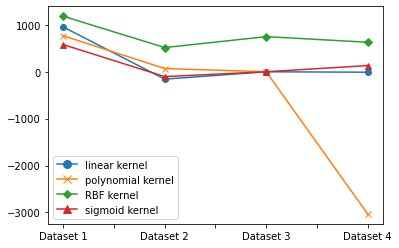

In [392]:
plot_a = df_diff_label.plot.line() #(title="Plot A") # inner products between points of different labels/classes (bigger the better)

for i, line in enumerate(plot_a.get_lines()):
    line.set_marker(markers[i])

plot_a.legend(handles=[blue_o, orange_x, green_dia, red_tri])

# save figure
plot_a_1 = plot_a.figure
plot_a_1.savefig(f'image/plot_a_1.jpg')

In [393]:
plot_a.set_ylim([-250,1300]) # disregarding the outlier which was too low
plot_a_2 = plot_a.figure
plot_a_2.savefig(f'image/plot_a_2.jpg') 

Now, the inner product between data points of the same classes

In [394]:
def sum_inner_product_same_label(kernel, dataset_img, dataset_label):

    index_label_zero = []
    index_label_one = []

    # find the index of the dataset which has label 0 and label 1
    for i in range(0,100):
        if dataset_label[i] == 0:
            index_label_zero.append(i)
        else:
            index_label_one.append(i)

    # print(index_label_zero)
    inner_product_list =[]

    # calculate the inner product between data points with different label 
    # with the purpose of checking whether they yield a big number, indicating a good separation, a small number, indicating a bad separation
    for i in index_label_zero: 
        for j in index_label_zero:
            inner_product = kernel(dataset_img[i], dataset_img[j])
            inner_product_list.append(inner_product)
            
    for i in index_label_one: 
        for j in index_label_one:
            inner_product = kernel(dataset_img[i], dataset_img[j])
            inner_product_list.append(inner_product)

    # we will sum the value of each inner product between two differently labeled data points 
    return sum(inner_product_list)

In [395]:
# Creating a 4x4 DataFrame
data_same_label = {
    'linear kernel': [sum_inner_product_same_label(linear_kernel, X_lin, y_lin), sum_inner_product_same_label(linear_kernel, X_poly, y_poly), sum_inner_product_same_label(linear_kernel, X_gaus, y_gaus), sum_inner_product_same_label(linear_kernel, X_tanh, y_tanh)],
    'polynomial kernel': [sum_inner_product_same_label(poly_kernel, X_lin, y_lin), sum_inner_product_same_label(poly_kernel, X_poly, y_poly), sum_inner_product_same_label(poly_kernel, X_gaus, y_gaus), sum_inner_product_same_label(poly_kernel, X_tanh, y_tanh)],
    'RBF kernel': [sum_inner_product_same_label(rbf_kernel, X_lin, y_lin), sum_inner_product_same_label(rbf_kernel, X_poly, y_poly), sum_inner_product_same_label(rbf_kernel, X_gaus, y_gaus), sum_inner_product_same_label(rbf_kernel, X_tanh, y_tanh)],
    'sigmoid kernel': [sum_inner_product_same_label(sigmoid_kernel, X_lin, y_lin), sum_inner_product_same_label(sigmoid_kernel, X_poly, y_poly), sum_inner_product_same_label(sigmoid_kernel, X_gaus, y_gaus), sum_inner_product_same_label(sigmoid_kernel, X_tanh, y_tanh)]
}
 
index_labels = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']
 
df_same_label = pd.DataFrame(data_same_label, index=index_labels)

print("Dataframe for sum of inner product between same labeled data points:")
print(df_same_label)

Dataframe for sum of inner product between same labeled data points:
           linear kernel  polynomial kernel   RBF kernel  sigmoid kernel
Dataset 1    2420.559137        2344.431573  2900.638701     1446.114841
Dataset 2    3547.186805       15609.731171  1948.361119     1648.794546
Dataset 3       0.565557           1.386632  1585.849578        0.306713
Dataset 4    2441.281430       17306.442573  1848.107579      829.338061


Plotting the dataframe

In [396]:
# preparation for color blind friendly plots

blue_o = mlines.Line2D([], [], color='#1f77b4', marker='o',
                          markersize=8, label='linear kernel')
orange_x = mlines.Line2D([], [], color='#ff7f0e', marker='x',
                          markersize=8, label='polynomial kernel')
green_dia = mlines.Line2D([], [], color='#2ca02c', marker='D',
                          markersize=6, label='RBF kernel')
red_tri = mlines.Line2D([], [], color='#d62728', marker='^',
                          markersize=8, label='sigmoid kernel')

markers = ["o", "x", "D", "^"]

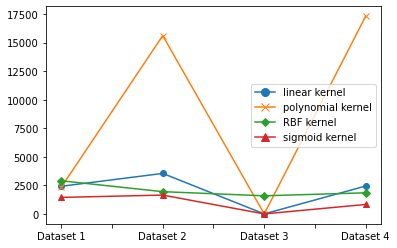

In [397]:
plot_b = df_same_label.plot.line() #(title="Plot B") # inner products between points of different labels/classes (smaller the better)

for i, line in enumerate(plot_b.get_lines()):
    line.set_marker(markers[i])

plot_b.legend(handles=[blue_o, orange_x, green_dia, red_tri])

# save figure
plot_b=plot_b.figure
plot_b.savefig(f'image/plot_b.jpg')